<a href="https://www.kaggle.com/code/hgvaishnavi/exploratory-data-analysis-r?scriptVersionId=216339654" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**EXPLORATORY DATA ANALYSIS**

# **A. FEATURES OF SUMMARIZATION**

## **1. Location Estimates**

Locates the center of the data

In [1]:
library(tidyverse)
library(dplyr)
library('matrixStats')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘matrixStats’




The following object is masked from ‘package:dplyr’:

    count




In [2]:
state <- read.csv('/kaggle/input/murder-rates-by-states/state.csv')

In [3]:
head(state)

,State,Population,Murder.Rate,Abbreviation
,<chr>,<int>,<dbl>,<chr>
1,Alabama,4779736,5.7,AL
2,Alaska,710231,5.6,AK
3,Arizona,6392017,4.7,AZ
4,Arkansas,2915918,5.6,AR
5,California,37253956,4.4,CA
6,Colorado,5029196,2.8,CO


**MEAN and MEDIAN**

In [4]:
mean(state[['Population']])              # MEAN
mean(state[['Population']], trim=0.1)    # TRIMMED MEAN
median(state[['Population']])            # MEDIAN

[1] 6162876

[1] 4783697

[1] 4436370

**WEIGHTED MEAN and WEIGHTED MEDIAN**

In [5]:
weighted.mean(state[['Murder.Rate']], w=state[['Population']])
weightedMedian(state[['Murder.Rate']], w=state[['Population']])

[1] 4.445834

[1] 4.4

KEY POINTS :

* The basic metric for location is the mean, but it can be sensitive to extreme values (outlier).
* Other metrics (weighted mean/median, trimmed mean) are less sensitive to outliers and unusual distributions and hence are more robust.

## **2. Variability Estimates**

Measures whether the data values are tightly clustered or spread out

In [6]:
sd(state[['Population']])
IQR(state[['Population']])
mad(state[['Population']])

[1] 6848235

[1] 4847308

[1] 3849870

KEY POINTS:

* Variance and standard deviation are the most widespread and routinely reported statistics of variability.
* Both are sensitive to outliers.
* More robust metrics include mean absolute deviation, median absolute deviation from the median, and percentiles (quantiles).

# **B. EXPLORING THE DATA DISTRIBUTION**

## **1. Percentiles and Boxplots**

In [7]:
# percentiles of murder rate by state

quantile(state[['Murder.Rate']], p=c(.05, .25, .5, .75, .95))

5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510

| 5%   | 25%  | 50%  | 75%  | 95%  |
|------|------|------|------|------|
| 1.60  | 2.42 | 4.00 | 5.55 | 6.51 |


The median is 4 murders per 100,000 people, although there is quite a bit of variability: the 5th percentile is only 1.6 and the 95th percentile is 6.51.

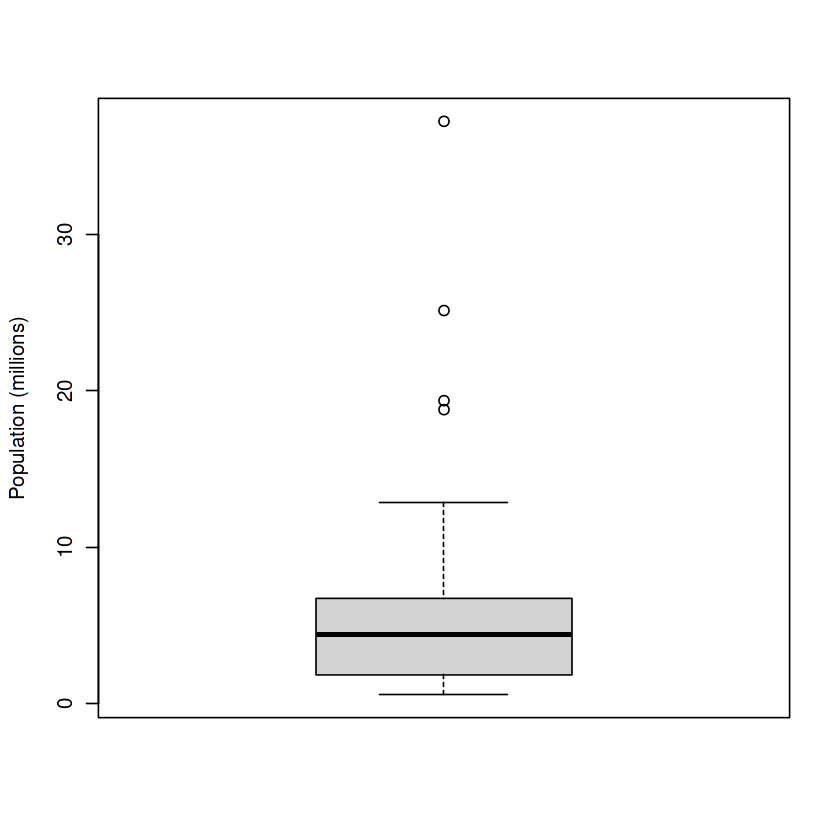

In [8]:
# boxplot of state populations

boxplot(state[['Population']]/1000000, ylab='Population (millions)')

* The **median state population** is about **5 million**, half the states fall between 2 million and 7 million, and there are some high population outliers. 

* The **top and bottom** of the box are the **75th and 25th** percentiles, respectively. 
* The **median** is shown by the **horizontal line** in the box. 
* The **dashed lines**, referred to as **whiskers**, extend from the top and bottom of the box to indicate the range for the bulk of the data. 

* The whiskers will not go beyond 1.5 times the IQR.

* Any data outside of the whiskers is plotted as single points or circles (often considered outliers).

## **2. Frequency Tables and Histograms**

A frequency table of a variable divides up the variable range into equally spaced segments and tells us how many values fall within each segment.

In [9]:
# frequency of population by state

breaks <- seq(from=min(state[['Population']]), to=max(state[['Population']]), length=11)
pop_freq <- cut(state[['Population']], breaks=breaks, right=TRUE, include.lowest=TRUE)
table(pop_freq)

pop_freq
[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] 
                 24                  14                   6                   2 
(1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] (2.62e+07,2.99e+07] 
                  1                   1                   1                   0 
(2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   1 

| Bin Number | Bin Range          | Count | States                                                                                           |
|------------|--------------------|-------|--------------------------------------------------------------------------------------------------|
| 1          | 563,626–4,232,658 | 24    | WY, VT, ND, AK, SD, DE, MT, RI, NH, ME, HI, ID, NE, WV, NM, NV, UT, KS, AR, MS, IA, CT, OK, OR  |
| 2          | 4,232,659–7,901,691 | 14    | KY, LA, SC, AL, CO, MN, WI, MD, MO, TN, AZ, IN, MA, WA                                          |
| 3          | 7,901,692–11,570,724 | 6     | VA, NJ, NC, GA, MI, OH                                                                          |
| 4          | 11,570,725–15,239,757 | 2     | PA, IL                                                                                          |
| 5          | 15,239,758–18,908,790 | 1     | FL                                                                                              |
| 6          | 18,908,791–22,577,823 | 1     | NY                                                                                              |
| 7          | 22,577,824–26,246,856 | 1     | TX                                                                                              |
| 8          | 26,246,857–29,915,889 | 0     |                                                                                                  |
| 9          | 29,915,890–33,584,922 | 0     |                                                                                                  |
| 10         | 33,584,923–37,253,956 | 1     | CA                                                                                              |


OBSERVATIONS:

- The least populous state with 563,626 people.
- The most populous with 37,253,956 people. 
- This gives a range of 37,253,956 – 563,626 = 36,690,330, which is divided up into equal size bins—let’s say 10 bins. 
- With 10 equal size bins, each bin will have a width of 3,669,033, so the first bin will span from 563,626 to 4,232,658, and so on.

* Two bins are empty, It is important to include the empty bins; the fact that there are no values in those bins is useful information.

* If bins are too large, important features of the distribution can be obscured.
* If bins are too small, the result is too granular, and the ability to see the bigger picture is lost.

A histogram is a way to visualize a frequency table, with bins on the x-axis and the data count on the y-axis.

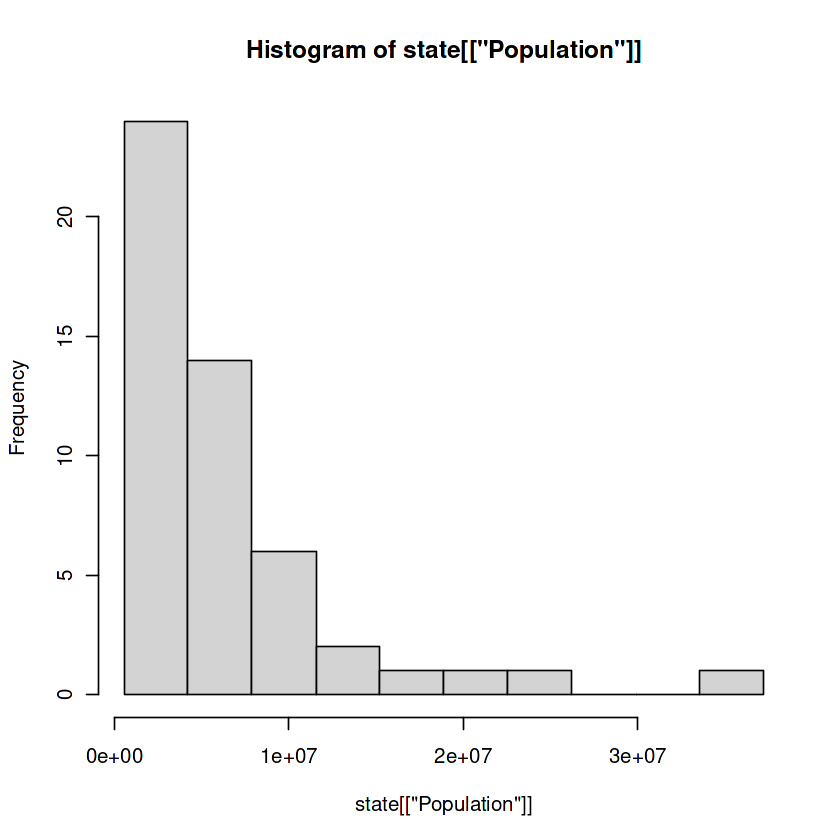

In [10]:
# histogram of state populations

hist(state[['Population']], breaks=breaks)

* Empty bins are included in the graph.
* Bins are of equal width.
* The number of bins (or, equivalently, bin size) is up to the user.
* Bars are contiguous—no empty space shows between bars, unless there is an
empty bin.

|                | Bin Range      | Count          |
|-----------------|----------------|----------------|
| Frequency Table| Same           | Different      |
| Histogram      | Different      | Same           |

## **3. Density Plots and Estimates**

Related to the histogram is a density plot, which shows the distribution of data values as a continuous line. A density plot can be thought of as a smoothed histogram, although it is typically computed directly from the data through a kernel density estimate.

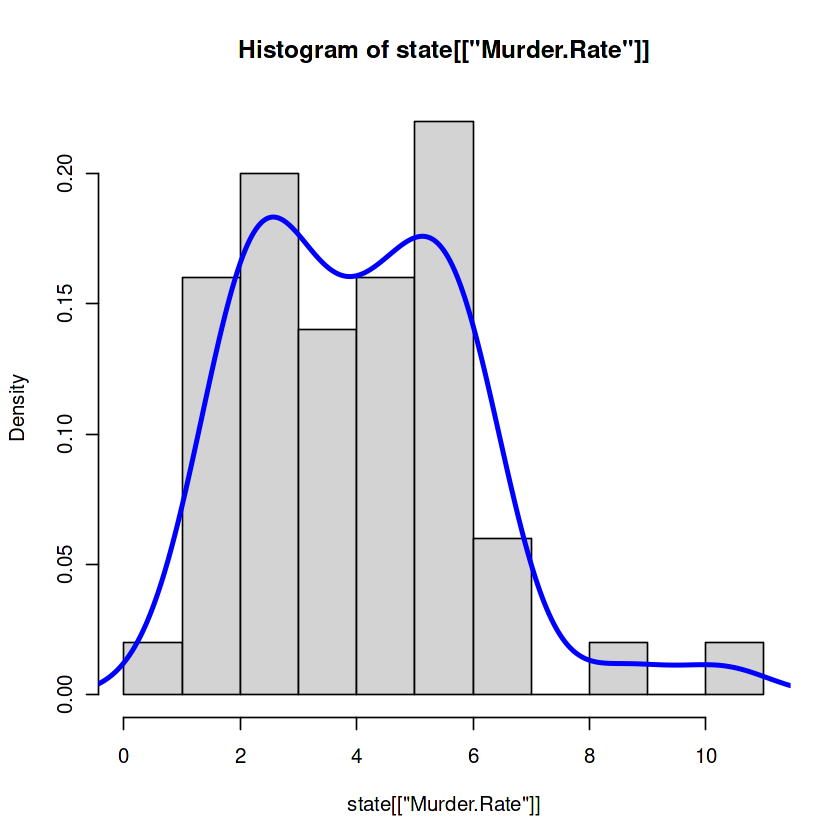

In [11]:
# Density of state Murder Rates

hist(state[['Murder.Rate']], freq=FALSE)
lines(density(state[['Murder.Rate']]), lwd=3, col='blue')

The total area under the density curve = 1, and instead of counts in bins you calculate areas under the curve between any two points on the x-axis, which correspond to the proportion of the distribution lying between those two points.

KEY POINTS:

* A frequency histogram plots frequency counts on the y-axis and variable values
on the x-axis; it gives a sense of the distribution of the data at a glance.
* A frequency table is a tabular version of the frequency counts found in a
histogram.
* A boxplot—with the top and bottom of the box at the 75th and 25th percentiles,
respectively—also gives a quick sense of the distribution of the data; it is often
used in side-by-side displays to compare distributions.
* A density plot is a smoothed version of a histogram; it requires a function to estimate
a plot based on the data (multiple estimates are possible, of course).

# **C. EXPLORING BINARY AND CATEGORICAL DATA**

In [12]:
dfw <- read.csv('/kaggle/input/dfw-airline/dfw_airline.csv')
dfw

Carrier,ATC,Weather,Security,Inbound
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
64263.16,84856.5,11235.42,343.15,118427.8


In [13]:
# percentage of delays by cause at Dallas/Fort Worth Airport

percentages <- round((dfw / sum(dfw)) * 100, 2)
percentages

Carrier,ATC,Weather,Security,Inbound
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23.02,30.4,4.03,0.12,42.43


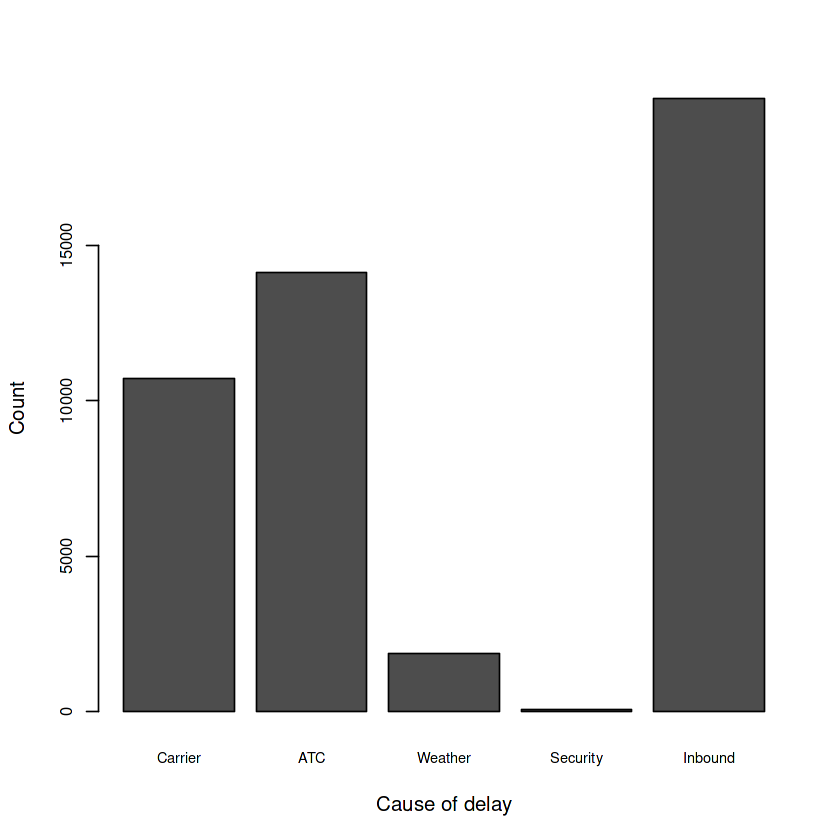

In [14]:
# bar chart of airline delays at DFW by cause

barplot(as.matrix(dfw) / 6 , cex.axis=0.8, cex.names=0.7,
xlab='Cause of delay', ylab='Count')

KEY POINTS: 

**Mode** The most commonly occurring category or value in a data set.

**Expected value** When the categories can be associated with a numeric value, this gives an average value based on a category’s probability of occurrence.

**Bar charts** The frequency or proportion for each category plotted as bars.

**Pie charts** The frequency or proportion for each category plotted as wedges in a pie.

Categorical data is typically summed up in proportions and can be visualized in a
bar chart.

Categories might represent distinct things (apples and oranges, male and female), levels of a factor variable (low, medium, and high), or numeric data that has been binned.

# **D. CORRELATIONS**

Establishes the relationship between two variables.

|| X | Y |
|-----------------------|------|-----|
| Positively Correlated | Increase | Increase |
|                       | Decrease | Decrease |
| Negatively Correlated | Increase | Decrease |
|                       | Decrease | Increase |


**Correlation coefficient**
A metric that measures the extent to which numeric variables are associated with one another (ranges from –1 to +1).

+1 : perfect positive correlation
0  : no correlation
-1 : perfect negative correlation

**Correlation matrix**
A table where the variables are shown on both rows and columns, and the cell
values are the correlations between the variables.

**Scatterplot**
A plot in which the x-axis is the value of one variable, and the y-axis the value of another.

In [15]:
sp500_px <- read.csv('/kaggle/input/loan-csv/data/sp500_data.csv')
sp500_sym <- read.csv('/kaggle/input/loan-csv/data/sp500_sectors.csv')

In [16]:
# correlation between telecommunication stock returns

telecom <- sp500_px[, sp500_sym[sp500_sym$sector == 'telecommunications_services', 'symbol']]
telecom <- telecom[row.names(telecom) > '2012-07-01',]
telecom_cor <- cor(telecom)
telecom_cor

,T,CTL,FTR,VZ,LVLT
T,1.0000000,0.45504470,0.3589222,0.68054379,0.08196360
CTL,0.4550447,1.00000000,0.4349380,0.44821425,0.09620112
FTR,0.3589222,0.43493798,1.0000000,0.34938989,0.11061445
VZ,0.6805438,0.44821425,0.3493899,1.00000000,0.09644136
LVLT,0.0819636,0.09620112,0.1106145,0.09644136,1.00000000


corrplot 0.92 loaded



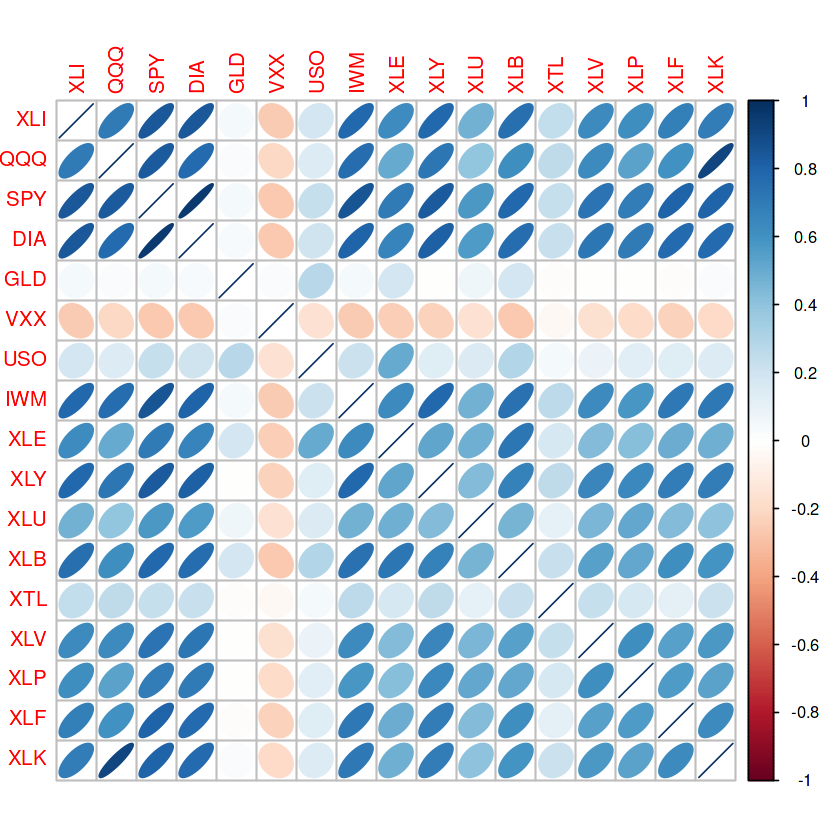

In [17]:
etfs <- sp500_px[row.names(sp500_px) > '2012-07-01', sp500_sym[sp500_sym$sector == 'etf', 'symbol']]
library(corrplot)
corrplot(cor(etfs), method='ellipse')

The orientation of the ellipse indicates whether two variables are positively correlated (ellipse is pointed to the top right) or negatively correlated (ellipse is pointed to the top left). 

The shading and width of the ellipse indicate the strength of the association: thinner and darker ellipses correspond to stronger relationships.

## **1. Scatterplots**

The standard way to visualize the relationship between two measured data variables is with a scatterplot.

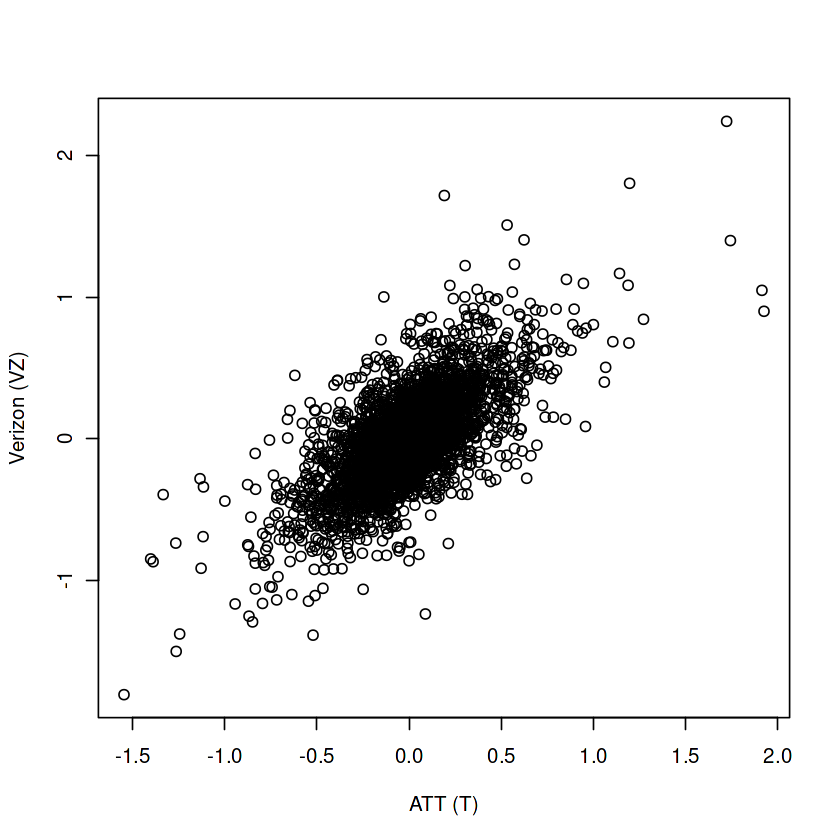

In [18]:
plot(telecom$T, telecom$VZ, xlab='ATT (T)', ylab='Verizon (VZ)')

# **E. EXPLORING TWO OR MORE VARIABLES**

## **1. Hexagonal Binning and Contours**
(Plotting Numeric vs Numeric Data)

In [19]:
kc_tax <- read.csv('/kaggle/input/loan-csv/data/kc_tax.csv')
nrow(kc_tax)

[1] 498249

For data sets with hundreds of thousands or millions of records, a scatterplot will be too dense, so we need a different way to visualize the relationship. To illustrate, consider the data set kc_tax, which contains the tax-assessed values for residential properties in King County,
Washington. In order to focus on the main part of the data, we strip out very expensive and very small or large residences using the subset function

In [20]:
kc_tax0 <- subset(kc_tax, TaxAssessedValue < 750000 & SqFtTotLiving > 100 & SqFtTotLiving < 3500)
nrow(kc_tax0)

[1] 432693

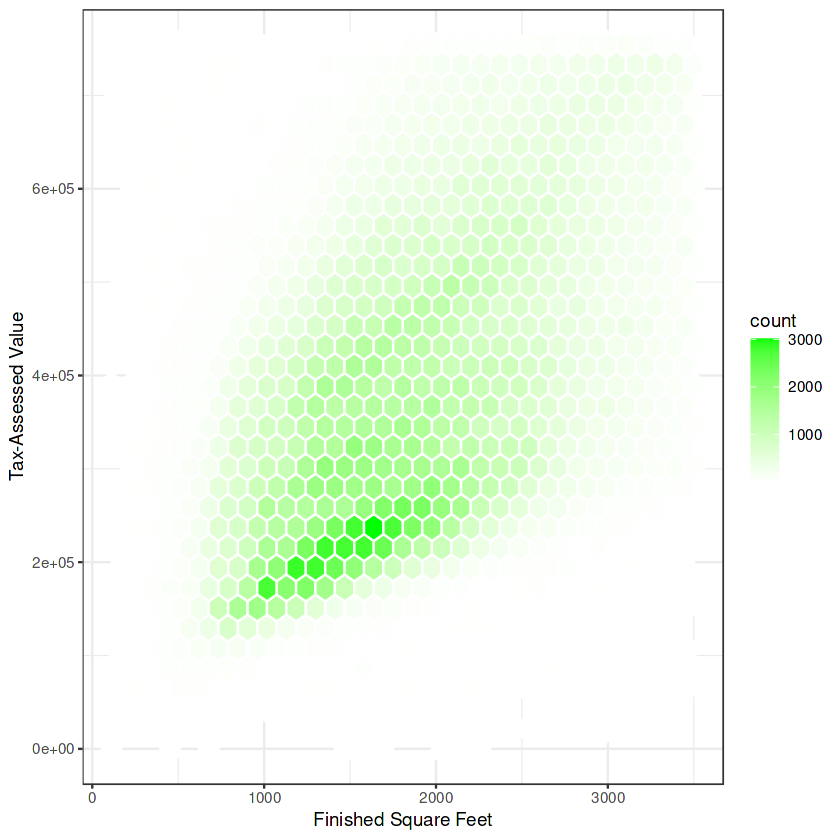

In [21]:
# Hexagonal binning for tax-assessed value versus finished square feet

library('ggplot2')
ggplot(kc_tax0, (aes(x=SqFtTotLiving, y=TaxAssessedValue))) +
stat_binhex(color='white') +
theme_bw() +
scale_fill_gradient(low='white', high='green') +
labs(x='Finished Square Feet', y='Tax-Assessed Value')

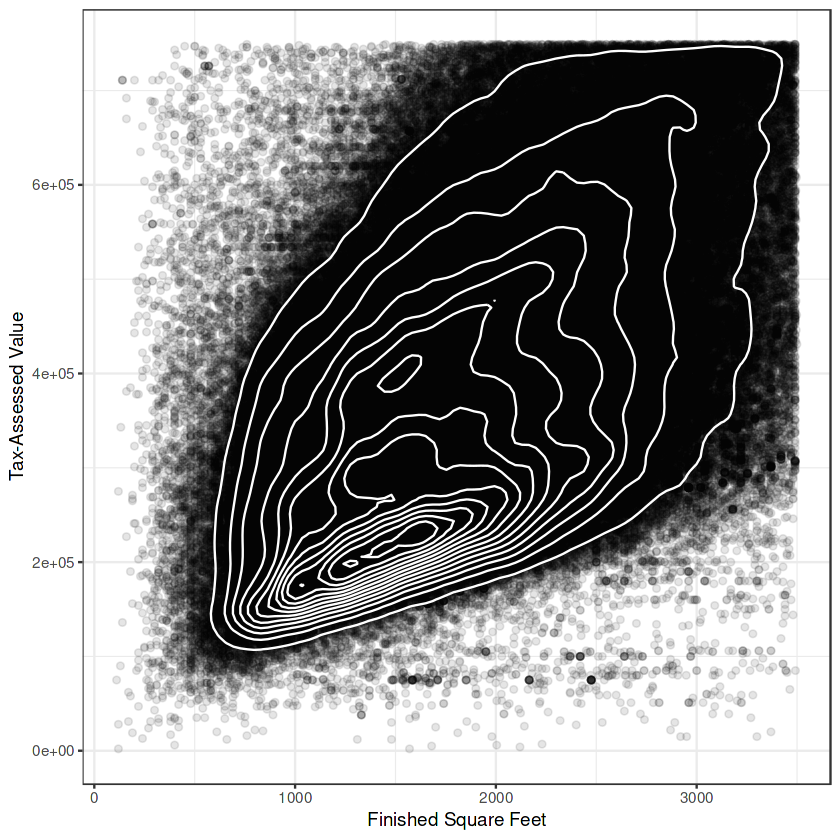

In [22]:
# Contour plot for tax-assessed value versus finished square feet

ggplot(kc_tax0, aes(SqFtTotLiving, TaxAssessedValue)) +
theme_bw() +
geom_point(alpha=0.1) +
geom_density2d(color='white') +
labs(x='Finished Square Feet', y='Tax-Assessed Value')

## **2. Two Categorical variables**

A useful way to summarize two categorical variables is a contingency table—a table of counts by category.

In [23]:
lc_loans <- read.csv('/kaggle/input/loan-csv/data/lc_loans.csv')

In [24]:
# Contingency table of loan grade and status

library(descr)
x_tab <- CrossTable(lc_loans$grade, lc_loans$status, prop.c=FALSE, prop.chisq=FALSE, prop.t=FALSE)
x_tab

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

                  lc_loans$status
lc_loans$grade    Charged Off   Current   Fully Paid     Late    Total
----------------------------------------------------------------------
A                        1562     50051        20408      469    72490
                        0.022     0.690        0.282    0.006    0.161
----------------------------------------------------------------------
B                        5302     93852        31160     2056   132370
                        0.040     0.709        0.235    0.016    0.294
----------------------------------------------------------------------
C                        6023     88928        23147     2777   120875
                        0.050     0.736        0.191    0.023    0.268
----------------------------------------------------------------------
D                        5007     53281        13681

## **3. Categorical and Numeric Data**

Boxplots are a simple way to visually compare the distributions of a numeric variable grouped according to a categorical variable.

In [25]:
airline_stats <- read.csv('/kaggle/input/loan-csv/data/airline_stats.csv')

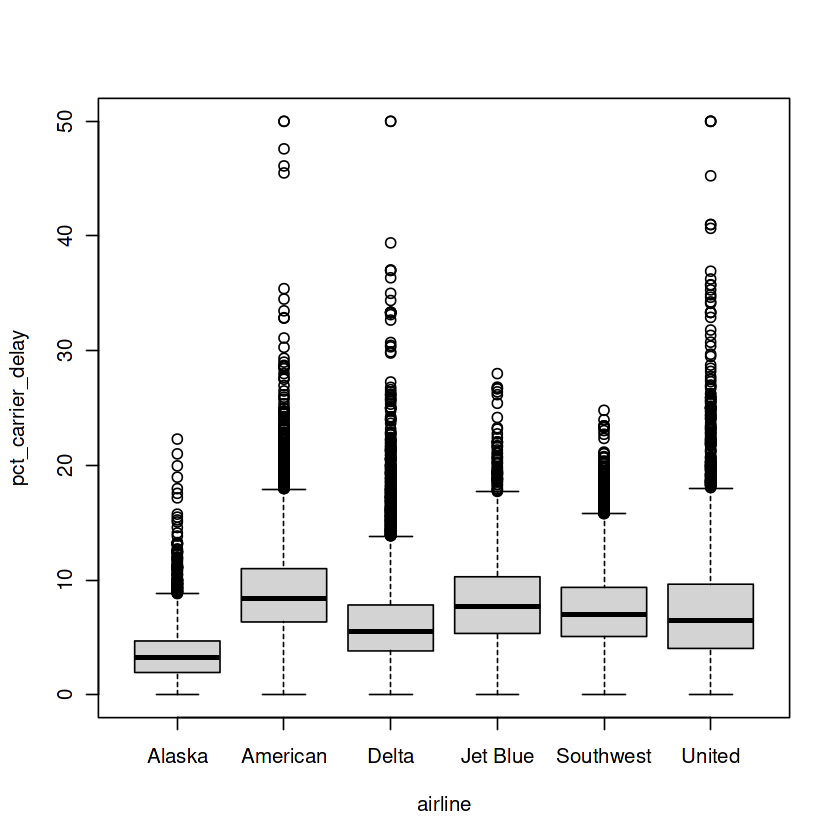

In [26]:
# Boxplot of percent of airline delays by carrier

boxplot(pct_carrier_delay ~ airline, data=airline_stats, ylim=c(0, 50))

The advantage of a violin plot is that it can show nuances in the distribution that aren’t perceptible in a boxplot. 

On the other hand, the boxplot more clearly shows the outliers in the data.

The violin plot shows a concentration in the distribution near zero for Alaska and, to a lesser extent, Delta. This phenomenon is not as obvious in the boxplot.

Warning message:
“Removed 38 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


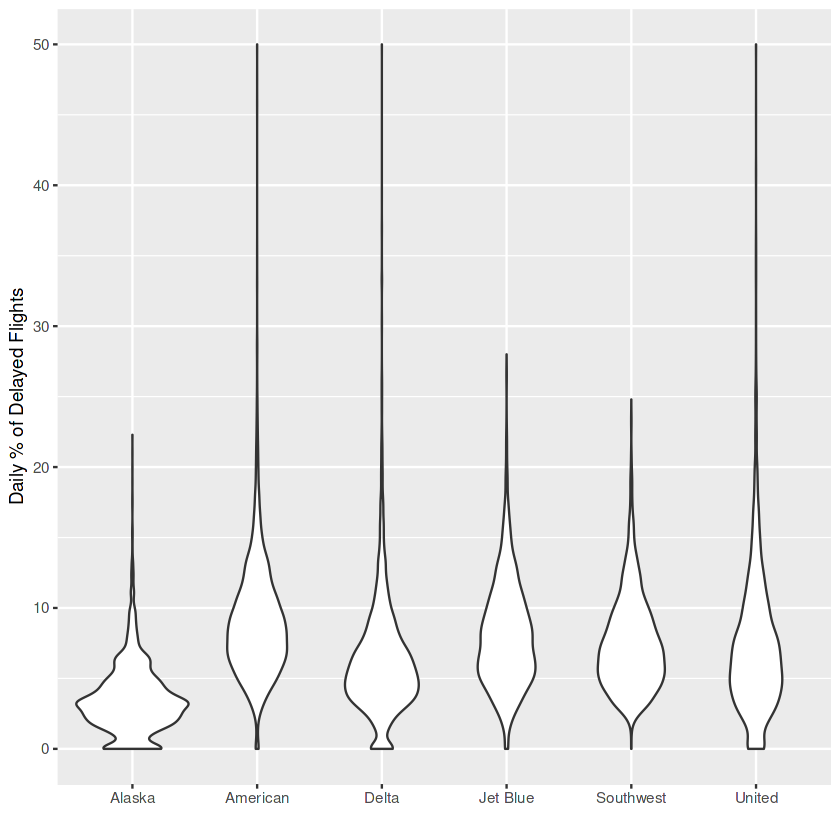

In [27]:
# Violin plot of percent of airline delays by carrier

ggplot(data=airline_stats, aes(airline, pct_carrier_delay)) +
ylim(0, 50) +
geom_violin() +
labs(x='', y='Daily % of Delayed Flights')

## **4. Visualizing Multiple Variables**

The relationship between homes’ finished square feet and their tax-assessed values, we observed that there appears to be a cluster of homes that have higher tax-assessed value per square foot. 

Diving deeper, accounts for the effect of location by plotting the data for a set of zip codes. Now the picture is much clearer: tax-assessed value is
much higher in some zip codes (98105, 98126) than in others (98108, 98188).

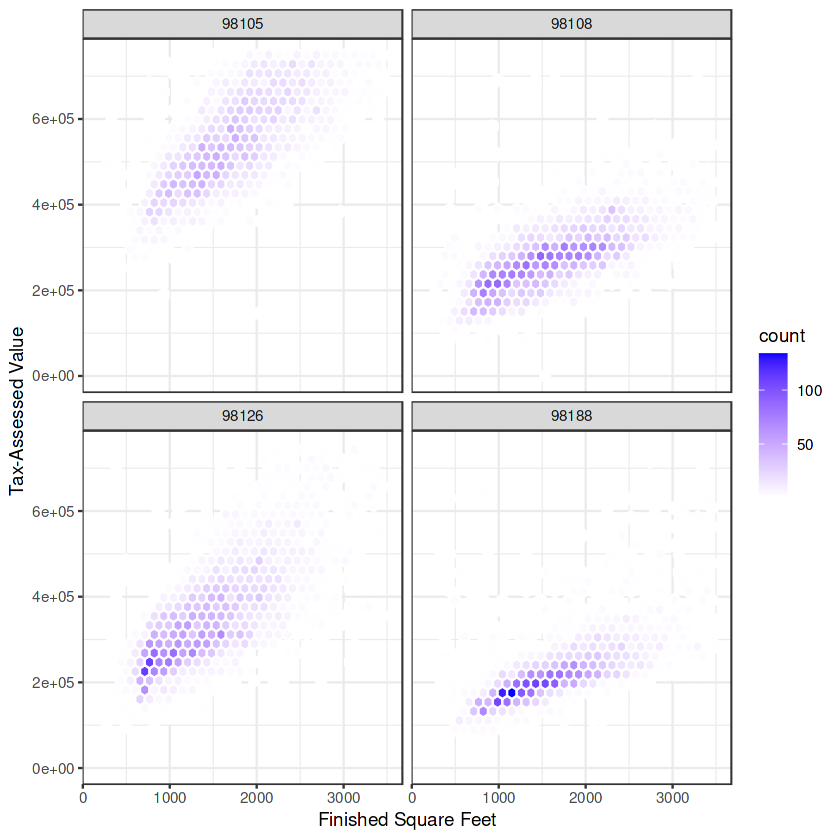

In [28]:
ggplot(subset(kc_tax0, ZipCode %in% c(98188, 98105, 98108, 98126)),
aes(x=SqFtTotLiving, y=TaxAssessedValue)) +
stat_binhex(color='white') +
theme_bw() +
scale_fill_gradient(low='white', high='blue') +
labs(x='Finished Square Feet', y='Tax-Assessed Value') +
facet_wrap('ZipCode')

KEY POINTS : 

* Hexagonal binning and contour plots are useful tools that permit graphical
examination of two numeric variables at a time, without being overwhelmed by
huge amounts of data.
* Contingency tables are the standard tool for looking at the counts of two categorical variables.
* Boxplots and violin plots allow you to plot a numeric variable against a categorical variable.

## EXTRAS

In [29]:
min_value <- min(state$Population, na.rm = TRUE)
max_value <- max(state$Population, na.rm = TRUE)
bin_count <- 10  # Define the number of bins
bin_breaks <- seq(min_value, max_value, length.out = bin_count + 1)  # Create evenly spaced breaks
bin_labels <- paste0(format(round(head(bin_breaks, -1)), big.mark = ","), 
                     "–", 
                     format(round(tail(bin_breaks, -1)), big.mark = ","))

# Create binned data
state <- state %>%
  mutate(Bin_Range = cut(Population, 
                              breaks = bin_breaks, 
                              labels = bin_labels, 
                              include.lowest = TRUE))

# Generate frequency table including 0 counts
frequency_table <- state %>%
  group_by(Bin_Range) %>%
  summarise(Count = n(), States = paste(Abbreviation, collapse = ", ")) %>%
  complete(Bin_Range = bin_labels, fill = list(Count = 0, States = "")) %>%
  mutate(BinNumber = row_number()) %>%
  select(BinNumber, Bin_Range, Count, States)

# View the table
View(frequency_table)


BinNumber,Bin_Range,Count,States
<int>,<chr>,<int>,<chr>
1,"563,626– 4,232,659",24,"AK, AR, CT, DE, HI, ID, IA, KS, ME, MS, MT, NE, NV, NH, NM, ND, OK, OR, RI, SD, UT, VT, WV, WY"
2,"4,232,659– 7,901,692",14,"AL, AZ, CO, IN, KY, LA, MD, MA, MN, MO, SC, TN, WA, WI"
3,"7,901,692–11,570,725",6,"GA, MI, NJ, NC, OH, VA"
4,"11,570,725–15,239,758",2,"IL, PA"
5,"15,239,758–18,908,791",1,FL
6,"18,908,791–22,577,824",1,NY
7,"22,577,824–26,246,857",1,TX
8,"26,246,857–29,915,890",0,
9,"29,915,890–33,584,923",0,
